# Basics

In [1]:
import numpy as np
import torch

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [3]:
device

device(type='cuda')

In [4]:
x = torch.ones((4, 3), device = device)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')


In [5]:
agg = x.sum()
agg_item = agg.item()
print(agg, type(agg), agg_item, type(agg_item), sep = "      ")

tensor(12., device='cuda:0')      <class 'torch.Tensor'>      12.0      <class 'float'>


In [6]:
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')

In [7]:
x.t_()

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], device='cuda:0')

In [8]:
x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], device='cuda:0')

In [9]:
a = torch.ones((4, 3), device = device)
# a = a.to('cpu')
a = a.cpu()
print(a)
b = a.numpy()
print(b, type(b))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] <class 'numpy.ndarray'>


# AutoGrad

In [10]:
x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad = True)
b = torch.randn(3, requires_grad = True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [11]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7f04fecb6610>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f04fecb6dd0>


In [12]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1973, 0.0521, 0.3197],
        [0.1973, 0.0521, 0.3197],
        [0.1973, 0.0521, 0.3197],
        [0.1973, 0.0521, 0.3197],
        [0.1973, 0.0521, 0.3197]])
tensor([0.1973, 0.0521, 0.3197])


In [13]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

True


In [14]:
with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)

False


In [15]:
z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

False


# Datasets and dataloader

In [16]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt
import numpy as np

In [17]:
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(10, dtype = torch.float).scatter_(0, torch.tensor(y), value = 1))
)

In [18]:
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(10, dtype = torch.float).scatter_(0, torch.tensor(y), value = 1))
)

In [19]:
training_data[0][-1]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [20]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])


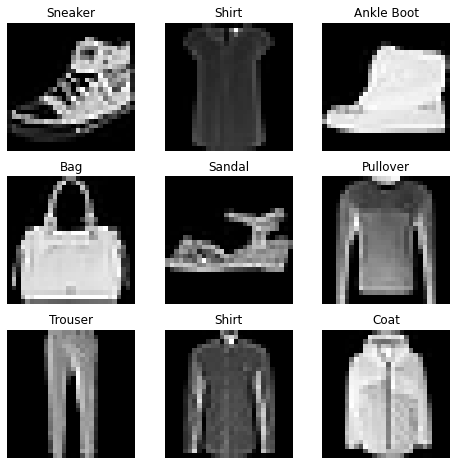

In [21]:
figure = plt.figure(figsize = (8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size = (1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    # plt.title(labels_map[label.numpy().argmax()])
    plt.title(labels_map[label.argmax().item()])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap = "gray")
    print(img.squeeze().shape)
plt.show()

In [22]:
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64, 10])


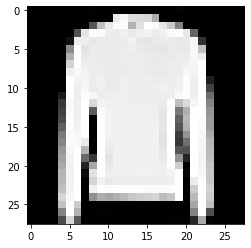

Label: 2


In [23]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap = "gray")
plt.show()
print(f"Label: {label.argmax().item()}")

In [24]:
# next(iter(train_dataloader))

# Model

In [22]:
from torch import nn

In [26]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [27]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [28]:
print(f"Model structure: {model}")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [29]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]}")

Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0339, -0.0295,  0.0125,  ...,  0.0004,  0.0354,  0.0303],
        [ 0.0147, -0.0153,  0.0016,  ...,  0.0157, -0.0053,  0.0312]],
       device='cuda:0', grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0194, 0.0205], device='cuda:0', grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0041, -0.0232,  0.0060,  ...,  0.0097, -0.0041, -0.0341],
        [ 0.0124, -0.0409,  0.0063,  ..., -0.0361,  0.0408,  0.0140]],
       device='cuda:0', grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.2.bias | Size: torch.Size([512]) | Values : tensor([-0.0076, -0.0280], device='cuda:0', grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.4.weight | Size: torch.Size([10, 512]) | Values : tensor([[ 0.0310,  0.0345,  0.0287,  ..., -0.0009, -0.0316, -0.0182],
        [-0.0185,  0.0052, -0.0208,  ..., -0.

### Not trained till now

In [30]:
test_feature, test_label = next(iter(test_dataloader))
test_feature, test_label = test_feature.to(device), test_label.to(device)
logits = model(test_feature)
pred_probab = nn.Softmax(dim = 1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Prodicted class: {y_pred}")
print(f"Actual class: {test_label.argmax(1)}")

Prodicted class: tensor([0, 0, 4, 1, 4, 6, 4, 4, 4, 6, 6, 4, 6, 6, 4, 4, 4, 6, 4, 6, 0, 0, 6, 0,
        6, 0, 0, 4, 4, 6, 0, 4, 4, 6, 6, 6, 4, 6, 6, 4, 6, 4, 0, 6, 6, 0, 1, 6,
        6, 4, 1, 6, 0, 4, 6, 6, 4, 0, 4, 4, 6, 4, 4, 0], device='cuda:0')
Actual class: tensor([1, 1, 0, 5, 4, 6, 9, 2, 9, 3, 0, 4, 3, 4, 9, 9, 7, 4, 8, 3, 7, 1, 1, 7,
        6, 1, 8, 8, 7, 9, 0, 2, 9, 4, 6, 8, 9, 6, 1, 9, 1, 9, 9, 7, 0, 5, 9, 5,
        4, 7, 6, 2, 3, 9, 4, 6, 6, 3, 9, 6, 4, 2, 2, 1], device='cuda:0')


# Optimizers and Loss function

In [31]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [32]:
loss_fn = nn.CrossEntropyLoss()

In [33]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# Saving Models

In [40]:
import torchvision.models as models

In [43]:
model1 = models.vgg16(pretrained = True)
torch.save(model1.state_dict(), 'model_weights.pth')

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [44]:
model2 = models.vgg16()
model2.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# Train and test loop

In [27]:
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

In [18]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (x, y) in enumerate(dataloader):
        x = x.to(device)
        y = y.to(device)
        pred = model(x)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if(batch % 100 == 0):
            loss, current = loss.item(), batch* len(x)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [19]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for x, y in dataloader:
            x = x.to(device)
            y = y.to(device)
            pred = model(x)
            test_loss +=loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>.1f}% Avg loss: {test_loss:>8f} \n")

In [23]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [33]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [35]:
learning_rate = 0.01
batch_size = 128
epochs = 30

train_dataloader = DataLoader(training_data, batch_size = batch_size, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = batch_size, shuffle = True)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)

print("Done")

Epoch 1

loss: 0.238505 [    0/60000]
loss: 0.198105 [12800/60000]
loss: 0.116586 [25600/60000]
loss: 0.148232 [38400/60000]
loss: 0.156656 [51200/60000]
Test Error: 
 Accuracy: 90.0% Avg loss: 0.293182 

Epoch 2

loss: 0.095209 [    0/60000]
loss: 0.139264 [12800/60000]
loss: 0.188025 [25600/60000]
loss: 0.102550 [38400/60000]
loss: 0.157864 [51200/60000]
Test Error: 
 Accuracy: 90.1% Avg loss: 0.289742 

Epoch 3

loss: 0.099974 [    0/60000]
loss: 0.127676 [12800/60000]
loss: 0.204173 [25600/60000]
loss: 0.086184 [38400/60000]
loss: 0.103458 [51200/60000]
Test Error: 
 Accuracy: 90.1% Avg loss: 0.290484 

Epoch 4

loss: 0.098277 [    0/60000]
loss: 0.102713 [12800/60000]
loss: 0.123565 [25600/60000]
loss: 0.115473 [38400/60000]
loss: 0.114238 [51200/60000]
Test Error: 
 Accuracy: 90.1% Avg loss: 0.290822 

Epoch 5

loss: 0.213955 [    0/60000]
loss: 0.156810 [12800/60000]
loss: 0.187131 [25600/60000]
loss: 0.122305 [38400/60000]
loss: 0.101762 [51200/60000]
Test Error: 
 Accuracy: 90